#Objective

In this colab we will implement Naive Bayes (NB) classifier from scratch.

# Naive Bayes Classifier

* Naive bayes classifier is a **generative classifier**.
* It **estimates probability** of a sample belonging to a class using **Bayes theorem**:
\begin{eqnarray} \text {posterior} &=& \frac{\text {prior} \times \text{likelihood} } { \text {evidence} } \\
 p(y|\mathbf x) &=& \frac{p(y) \times p(\mathbf x |y) }{p(\mathbf x)} \end{eqnarray}

* It simplifies the calculation of **likelihood** with conditional independence assumption: NB assumes that the features are conditionally independent given labels.
 * The **likelihood** can be expressed as: 
 \begin{eqnarray} p(\mathbf x| y) &=& p(x_1,x_2,\ldots,x_m|y) \\
 &=& p(x_1|y) \ p(x_2|y) \ldots\ p(x_m|y) \\
 &=& \prod_{j=1}^{m}p(x_j|y) \end{eqnarray}

* Substituting likelihood in the Bayes theorem gives us the following formula:
\begin{equation}p(y=y_c|\mathbf x)= \frac{p(y_c)\prod_{j=1}^{m}p(x_j|y_c)}{\sum_{r=1}^kp(y_r) \prod_{j=1}^{m}p(x_j|y_r)}\end{equation}

## Inference



* We perform this calculation in **log-space** to avoid issues with underflow due to multiplication of small numbers:
 * The label that results in the **highest value of the numerator** i.e $\color{red} { \text {likelihood} \times \text{prior}}$ is assigned to the given example. *Note that the evidence is fixed for all labels and acts as a normalizing constant.* 

\begin{equation} y = \text {argmax}_y \log p(y) + \sum_{j=1}^{m}\log p(x_j|y) \end{equation}

* Posterior probability however needs full calculation of the Bayes formula:
 * We first product of likelihood and prior for each label in log space:
 \begin{equation} \log p(\mathbf x, y_r) =\log p(y_r) + \sum_{j=1}^{m} 
 \log p(x_j|y_r) \end{equation} and convert that to probability by taking

 \begin{equation} p(\mathbf x, y_r)=\color{red} {\exp (\log p(\mathbf x,y_r))}\end{equation}
 * Sum up these probabilities for obtaining the evidence or the denominator of the formula.
 \begin{equation} p(\mathbf x) = \sum_{r=1}^{k} p(\mathbf x,y_r)=\sum_{r=1}^{k} \exp (\log p(\mathbf x,y_r)) \end{equation}
 * Substituting these values one can obtain the posterior probability.
 \begin{equation} p(y_r|\mathbf x) = \frac{p(\mathbf x, y_r)}{p(\mathbf x)}\end{equation}
 
NB classifier is used in applicaiton like **document classification** and **spam filtering**.

## Learning problem

In [2]:
X=np.array([[1,0],[0,1],[0,1],[1,0],[1,1],[1,1]])
y = np.array([1,0,0,1,2,2])

NameError: ignored

Estimation of parameters of Bernoulli distribution and class priors.


In [3]:
ber_nb = BernoulliNB() 
ber_nb.fit(X,y)

NameError: ignored

In [ ]:
# let's predict probabilities for each example.
ber_nb.predict_proba(X)

* $k$ prior probabilities to be estimated: $\{p(y_1),p(y_2),\ldots,p(y_k)\}$
* $k \times m$ class conditional probabilities: $\{p(x_1|y_1,\ldots, p(x_m|y_1,p(x_1|y_2),\ldots,p(x_m|y_2),\ldots,p(x_1|y_k),\ldots,p(x_m|y_k)\}$

The class conditional densities depend on the nature of features.

The following are some popular class conditional densities used in NB classifier: 

* **Bernoulli distribution**: when $x_j$ is a **binary feature**, we use Bernoulli distribution to model the class conditional density: $p(x_j|y_c)$.
* **Categorical distribution**: When $x_j$ is a **categorical feature** i.e. it takes one of the $e \gt 2$ discrete values \[e.g. {red,green,blue} or roll of a dice\], we use categorical distribution to model the class conditional density $p(x_j|y_c)$
* **Multinomial distribution**: When $\mathbf x$ is count vector i.e. each component $x_j$ is a count of apperance in the object it represents and $\sum x_j=l$, which is the length of the object, we use multinomial distribution to model $p(\mathbf x|y_c)$
* **Gaussian distribution**: When $x_j$ is a **continuous feature** i.e. it takes a real value, we use gaussian (or normal) distribution to model the class conditional density $p(x_j|y_c)$.

We will implement these different class conditional densities in different NB implementations. We will discuss parameter estimation in detail in the respective sections.

# Bernouille NB: Implementation

##Parameter estimation: Class conditional density and prior

Remember that the **class conditional density** for Bernoulli NB is calculated as follows:
\begin{equation} w_{y_c} = \frac{\sum_{i=1}^{n} \mathbb {1} (y^{(i)}=y_c)}{n} \end{equation}Here-

* The numerator gives us **total number of examples with label $y_c$ and is divided by the total number of examples in the training set**.

While estimating parameters of the model, we process examples from each label separately and estimate the parameters.


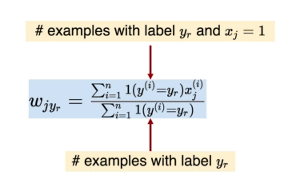

In [5]:
import numpy as np


In [6]:
def fit(X,y):
  
  n_samples, n_features = X.shape
  class_counts = np.unique(y)
  n_classes = len(class_counts)
  
  w = np.zeros((n_classes,n_features),dtype=np.float64)
  w_priors = np.zeros(n_classes, dtype=np.float64) #defining datatype is important

  for c in range(n_classes):

    X_c = X[y == c]

    w[c,:] = np.sum(X_c, axis = 0)/ X_c.shape[0]
    w_priors[c] = X_c.shape[0] / n_samples


  # w =  sum of examples with y_c as labels
  print("Weight vector",w)
  print("priors",w_priors)
  return w,w_priors 

In [7]:
X = np.array([[1,0], [0, 1], [0, 1], [1, 0]])
y = np.array([1, 0, 0, 1])

fit(X,y)

Weight vector [[0. 1.]
 [1. 0.]]
priors [0.5 0.5]


(array([[0., 1.],
        [1., 0.]]), array([0.5, 0.5]))

A few observations:
* Since there are 50% examples of each class 1 and class 0, the prior probability vector has 0.5 for each class.
* Note that
  * For class 0, $x_1=0 \ \text {and} \ x_2=1$ and hence the parameters of bernoulli distributions are 0 and 1 respectively.
   * $w_{01}=0,w_{02}=1$
* For class 1, $x_1=1 \ \text {and} \ x_2=0$ and hence the parameters of bernoulli distributions are 0 and 1 respectively.
   * $w_{11}=1,w_{21}=0$





### Step by Step break down

Let's understand class conditional density calculation step-by-step:\
**STEP 1**: Filter examples for a class, say c=1

In [8]:

X_c = X[y==1]; X_c

array([[1, 0],
       [1, 0]])

 **STEP 2**: Feature wise sum.


In [9]:
np.sum(X_c, axis=0) 

array([2, 0])

**STEP 3**: Dividing by class count

In [10]:
w = np.sum(X_c, axis=0)/X_c.shape[0]
w

array([1., 0.])

## Incorporating Laplace correction

As we talked in the lecture slides, the 0 value for parameter is a problem as it leads to 0 posterior probability. We can fix this problem with **Laplace correction** or by adding a small dummy counts in each class for each feature.
* The **class priors** with laplace correction can be calculated as follows:

 \begin{equation} p(y=y_c)= \frac{\sum \limits_{i=1}^n 1(y^{(i)}=y_c) + \alpha}{n+k\alpha}\end{equation}
* The class conditional density with laplace correction is computed as follows:
\begin{equation} \frac{\sum \limits_{i=1}^n 1(y^{(i)}=y_c)x_j^{(i)}+\alpha}{\sum \limits_{i=1}^n 1(y^{(i)}=y_c)+2\alpha}\end{equation} In both cases, we use $\alpha=1$. (**Laplace correction or smoothing**)







## Inference

 Determine class label

Remember that we assign class label $y_c$ that results in the largest product of likelihood and prior.

\begin{eqnarray} y_c &=& \text{argmax}_{y_c}\left(\sum \limits_{j=1}^m \log \ p(x_j|y_c;\mathbf w)\right)+ \log \ p(y_c;\mathbf w) \\
&=& \text{argmax}_{y_c} \left(\sum \limits_{j=1}^m w_{jy_c}^{x_j}(1-w_{jy_c})^{1-x_j}\right)+\log \ p(y_c;\mathbf w)\\
&=& \text{argmax}_{y_c}\left(\sum \limits_{j=1}^m \log \ w_{jy_c}+(1-x_j) \log \ (1-w_{jy_c})\right)+\log \ p(y_c; \mathbf w)\end{eqnarray} 

Note that we perform these computations in log space to avoid problem with underflow.

Further with vectorization, this is implemented as follows:

$y=\text{argmax}_y \mathbf X \log \mathbf w^T + (1-\mathbf X) \log (1-\mathbf w)^T + \log \mathbf w_{\text {prior}} $

## Implementation

In [11]:
class BernoulliNB(object):
  def __init__(self,alpha=1.0):
    self.alpha = alpha

  def fit(self,X,y):
    n_samples, n_features = X.shape
    class_count = np.unique(y)
    n_classes = len(class_count)

    self.w = np.zeros((n_classes, n_features),dtype=np.float64)
    self.w_priors = np.zeros(n_classes,dtype=np.float64)

    for  c in range(n_classes):

      X_c = X[y==c]

      self.w[c,:]= (np.sum(X_c, axis=0)+ self.alpha)/(X_c.shape[0]+2*self.alpha)
      self.w_priors[c] = (X_c.shape[0]+self.alpha)/(float(n_samples) + n_classes * self.alpha)

    print("Class conditional density:", self.w) 
    print("Prior:", self.w_priors)
       

  def log_likelihood_prior_prod(self,X):
    return X@(np.log(self.w).T)+(1-X)@np.log((1-self.w).T)+ np.log(self.w_priors)
  
  def predict_proba(self,X):
    q= self.log_likelihood_prior_prod(X)
    return np.exp(q)/np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)
    #print(np.exp(q))
    #return np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)
  def predict(self,X):
    return np.argmax(self.log_likelihood_prior_prod(X),axis=1)


## DEMO

### Binary classification Setup

In [12]:
ber_nb = BernoulliNB() 
ber_nb.fit(X,y)

Class conditional density: [[0.25 0.75]
 [0.75 0.25]]
Prior: [0.5 0.5]


In [13]:
#Let's predict classes for input example.
ber_nb.predict(X)


array([1, 0, 0, 1])

In [14]:
# The class labels are inferred by selecting the label that results into 
# highest value of product of likelihood and priors: 
a = ber_nb.log_likelihood_prior_prod(X)

In [40]:
a

array([[-3.4657359 , -1.26851133],
       [-1.26851133, -3.4657359 ],
       [-1.26851133, -3.4657359 ],
       [-3.4657359 , -1.26851133]])

Observe that based on this calculation, the first example gets class 1, second one gets class 0, third also gets class 0 and the last one gets class 1.

In [15]:
# let's predict probabilities for each example.
ber_nb.predict_proba(X)

array([[0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9]])

### Multiclass classification setup

The NB implementation also works in multiclass setting. Here is an example with three classes.


In [16]:
X=np.array([[1,0],[0,1],[0,1],[1,0],[1,1],[1,1]])
y = np.array([1,0,0,1,2,2])

Estimation of parameters of Bernoulli distribution and class priors.


In [17]:
ber_nb = BernoulliNB() 
ber_nb.fit(X,y)

Class conditional density: [[0.25 0.75]
 [0.75 0.25]
 [0.75 0.75]]
Prior: [0.33333333 0.33333333 0.33333333]


In [18]:
# let's predict probabilities for each example.
ber_nb.predict_proba(X)

array([[0.07692308, 0.69230769, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.07692308, 0.69230769, 0.23076923],
       [0.2       , 0.2       , 0.6       ],
       [0.2       , 0.2       , 0.6       ]])

# Gaussian NB: Implementation









##Parameterization 

$ \\ \\ $

Here the features have real numbers or continuous values. And we assume that **each feature given label is drawn from a gaussian distribution.** Formally we write it as
$$ 
x_j|y_r   \sim   \mathcal{N} (\mu , \sigma^2)
$$

There are two parameters in Gaussian or normal distribution $\mathcal{N} :$
* Mean $ \mu $
* Variance $ \sigma^2 $ 

There are $ m \times k $ **Gaussian distribution** - one for each feature and label.

Each Gaussian distribution has 2 parameters to estimate hence the **total number of parameters** are $2 \times m \times k$.


## Alternate parameterization through multi-variate Gaussian

Alternatively, for each label, we can assume a multi-variate Gaussian distribution with $ m $ variables,Such a distribution will have

* a **mean vector** $(\mu)$ with $m$ components - one mean per feature.
* a **covariance matrix** $(\sum ) \text {with} m \times m $ entries-
 * However since we are making a conditional independence assumption among variables, the covariance matrix is assumed to be diagonal-
  * It's off-diagonal entries are $ 0 \sum_{jr}=0 \ \text {where} \ j \ne r$.
  * The diagnonal entries denote variance for each feature $ \sum_{jj}= \sigma^2$.

In this scheme, we need to estimate $k $ multi-variate Gaussian distributions, one per label.

For each distribution, we need to estimate
* $m$ means
* $m$ variances
$\\$
As such the number of parameters are the same in both the representation. However the later representation is more efficient in terms of computation.


## Parameter estimation

Let **$ n_r $ the total number of samples with label** $y_r$.
$$ n_r = \sum \limits_{i=1}^n \mathbb{1}(y^{(i)}=y_r) $$

The parameters for **multivariate Gaussian** for label $r$ can be calculated as follows:
\begin{eqnarray} \mu_r &=&\frac{1}{n_r}\sum \limits_{i=1}^n 1(y^{(i)}=y_r) \mathbf x^{(i)} \\ 
{{\sum}_{jjr}^2}&=&\frac{1}{n_r}\sum \limits_{i=1}^n 1(y^{(i)}=y_r)(\mathbf x^{(i)}-\mu_r)^2 \end{eqnarray}


##Inference 

The posterior probability can be  calculated based on Bayes theorem:
$$ p(y=y_c | \mathbf x) = \frac{p(\mathbf x| y_c) \ p(y_c)}{p(\mathbf x)}$$

The likelihood is computed with following formula:
$$ p(x_j|y_c; \mu_{jc},\sigma_{jc}^2)=\frac{1}{\sqrt {2 \pi} \sigma_{jc}} e^{- \frac{1}{2} \left(\frac{x_j-\mu_{jc}}{\sigma{jc}} \right)^2}$$

This can be implemented with multi-variate Gaussian distribution with diagonal covariance matrix:
$$ p(x_j|y_c; \mu_{jc},{\sum}_c)=\frac{1}{{(2\pi)}^{\frac{d}{2}} |{\sum}_c|^{\frac{1}{2}}}e^{-\frac{1}{2}}(\mathbf x -\mu_c)^T \small \small {\small {\sum}_c^{-1}}(\mathbf x -\mu_c)$$ 

It is interesting to note that
* We calculate the distance between the mean and the sample normalized by the variance: ${-\frac{1}{2}}(\mathbf x -\mu_c)^T \small \small {\small {\sum}_c^{-1}}(\mathbf x -\mu_c)$

* We calculate exponential of this distance and convert it into probability by dividing it with ${{(2\pi)}^{\frac{d}{2}} |{\sum}_c|^{\frac{1}{2}}}$


## Implementation

In [19]:
class GaussianNB(object):
  def fit(self,X,y):
    '''parameter estimation for gaussian distribution''' 
    n_samples, n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)


    #calculate mean, var, and prior for each class.

    self._mean = np.zeros((n_classes, n_features), dtype=np.float64) 
    self._var = np.zeros((n_classes, n_features),dtype=np.float64)
    self._priors = np.zeros(n_classes, dtype=np.float64)

    for idx, c in enumerate(self._classes):
      # Get examples with label $c$ 
      X_c = X[y==c] 

      #estimate mean from the training examples of class $c$ 
      self._mean[idx,:]= X_c.mean(axis=0)

      #estimate variance from the training examples of class $c$. 
      self._var[idx, :]=X_c.var(axis=0)

      #estimate the priors - based on fraction of examples with label c
      # among all the training examples.

      self._priors[idx]=X_c.shape[0]/float(n_samples)
    print("Mean:", self._mean)
    print("Variance:",self._var) 
    print("Priors:", self._priors) 


  def _calc_pdf(self, class_idx, X):
    ''' calculates probability density for samples for class label class_idx.''' 
    mean = self._mean[class_idx]
    var = np.diag(self._var[class_idx])
    z = np.power(2*np.pi, X.shape[0]/2)*np.power(np.linalg.det(var),1/2)
    return (1/z)*np.exp(-(1/2)*(X-mean).T@(np.linalg.inv(var))@(X-mean)) 

  def _calc_prod_likelihood_prior(self,X):
    ''' calculates product of likelihood and priors.''' 
    self._prod_likelihood_prior= np.zeros((X.shape[0],len(self._classes)),dtype=np.float64)
    
    for x_idx, x in enumerate(X):
      for idx, c in enumerate(self._classes):
        self._prod_likelihood_prior[x_idx,c]=(np.log(self._calc_pdf(idx,x))+ np.log(self._priors[idx])) 

  def predict(self,X):
    ''' predict class labels for each example'''
    self._calc_prod_likelihood_prior(X)
    return np.argmax(self._prod_likelihood_prior, axis=1)

  def predict_proba(self,X):
    ''' calculates probability of each example belonging to different classes.'''
    self._calc_prod_likelihood_prior(X)
    return np.exp(self._prod_likelihood_prior)/np.expand_dims(
        np.sum(np.exp(self._prod_likelihood_prior),axis=1),axis=1  )


##Demo

$ \\ \\ $ 
#Binary classification 
* Generates examples from two classes.
* Divide the data into train and test split.
* Train the model on the examples from training set.
* Evaluate the classification performation on the test set.

**STEP 1**: Generate training data with two multi-variate Gaussian distribution one with mean \[5,5\] and the second one with mean \[10,10\] and standard deviation 1.5 for each Gaussian.

* The number of features per example = 2 
* Total number of examples =100



In [20]:
from sklearn.datasets import make_classification, make_blobs 
from sklearn.model_selection import train_test_split 
X,y = make_blobs(n_samples=100,
                 n_features=2,
                 centers = [[5,5],[10,10]],
                 cluster_std=1.5,
                 random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)



**STEP 2** Train the naive bayes classifier.


In [21]:
gaus_nb = GaussianNB()
gaus_nb.fit(X_train,y_train)

Mean: [[ 4.55853975  5.01739665]
 [10.30431548 10.08580617]]
Variance: [[2.13298417 2.30222002]
 [3.22242307 2.20662074]]
Priors: [0.5125 0.4875]


Observe that since each examples has two features and we have two classes, we have
* Mean vector for each class has two components-mean for feature 1 and feature 2.
* Variance also has two entries-one for variance of feature 1 and feature 2. Note that we are only storing the diagonal elements of covariance matrix for each class label.

There are two priors-one for each class.

Since we are performing parameter estimation on examples generated from the known distributions, we can compare estimated means with the actual means.

* One distribution has mean close to \[5,5\] and the other one has mean close to \[10,10\] which are **very close to the actual means**.

**STEP 3**: Plot the gaussian distributions.



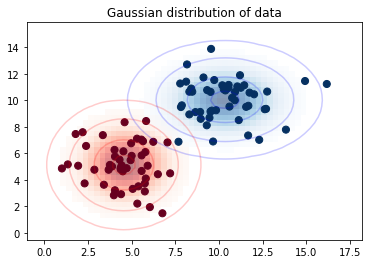

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')

xlim = (min(X[:,0])-2, max(X[:,0])+2)
ylim = (min(X[:,1])-2, max(X[:,1])+2)

xg = np.linspace(xlim[0],xlim[1],60)
yg = np.linspace(ylim[0],ylim[1],40)

xx,yy = np.meshgrid(xg,yg)
Xgrid = np.vstack([xx.ravel(),yy.ravel()]).T


for label, color in enumerate (['red','blue']):
  mask = (y==label)
  mu,std = X[mask].mean(0), X[mask].std(0)
  P = np.exp(-0.5* (Xgrid -mu)**2 /std**2).prod(1)
  Pm = np.ma.masked_array(P, P<0.03)
  ax.pcolorfast(xg,yg, Pm.reshape(xx.shape),alpha=0.5,cmap=color.title()+'s')
  ax.contour(xx,yy,P.reshape(xx.shape),levels=[0.01,0.1,0.5,0.9],colors = color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)
plt.title("Gaussian distribution of data")
plt.show()

**STEP 4**: Let's test the inference procedure on the test data.
* Let's get class predictions for the test examples.


In [23]:
gaus_nb.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0])

* Generate the classification report-containing information about different classification evaluation metrics like precision, recall, F1-score and accuracy.


In [24]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,gaus_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



* Let's get probability of each example belong to each  class.


In [25]:
gaus_nb.predict_proba(X_test)

array([[9.99999746e-01, 2.54140753e-07],
       [7.63749214e-14, 1.00000000e+00],
       [4.23038642e-03, 9.95769614e-01],
       [9.99986614e-01, 1.33855473e-05],
       [7.05769182e-06, 9.99992942e-01],
       [9.99820566e-01, 1.79433743e-04],
       [9.72541524e-01, 2.74584756e-02],
       [9.99982043e-01, 1.79572091e-05],
       [2.85910189e-05, 9.99971409e-01],
       [1.01888837e-07, 9.99999898e-01],
       [7.39129058e-01, 2.60870942e-01],
       [9.99793438e-01, 2.06561658e-04],
       [9.99999915e-01, 8.46737165e-08],
       [2.03213294e-05, 9.99979679e-01],
       [8.76198350e-09, 9.99999991e-01],
       [6.51163513e-05, 9.99934884e-01],
       [9.27638525e-05, 9.99907236e-01],
       [7.58034673e-09, 9.99999992e-01],
       [1.81773339e-03, 9.98182267e-01],
       [9.99985544e-01, 1.44557945e-05]])

Let's make a prediction for new data point.


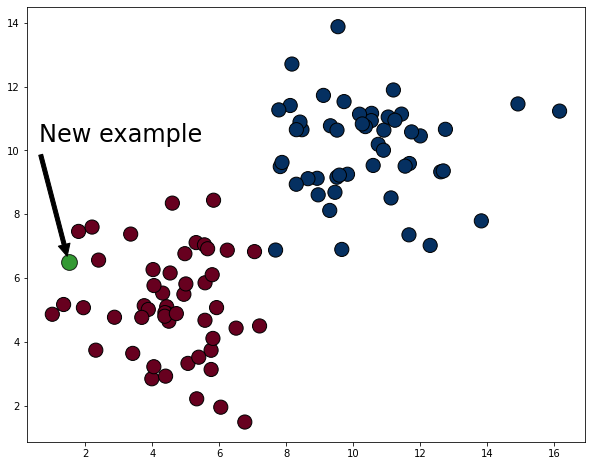

In [26]:
x_new = np.array([1.5,6.5])

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],marker='o', c=y, s=200, edgecolor='k',cmap='RdBu')

plt.scatter(x_new[0],x_new[1],marker='o',c='green',s=250, edgecolor='k',alpha=0.8)

plt.annotate("New example",xy=x_new, xytext=(-30,120),textcoords='offset points',arrowprops=dict(facecolor='black',shrink=0.05),fontsize=24)
plt.show()

Since the data point is close to Gaussian distribution with mean [5,5], it will get label of that class.


In [27]:
gaus_nb.predict_proba(np.array([x_new]))


array([[9.99996296e-01, 3.70449944e-06]])

In [28]:
from sklearn.datasets import make_classification, make_blobs 
from sklearn.model_selection import train_test_split 
X,y = make_blobs(n_samples=100,
                 n_features=2,
                 centers = [[5,5],[10,10]],
                 cluster_std=1.5,
                 random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)



**STEP 2** Train the naive bayes classifier.


In [29]:
gaus_nb =GaussianNB()
gaus_nb.fit(X_train,y_train)

Mean: [[ 4.55853975  5.01739665]
 [10.30431548 10.08580617]]
Variance: [[2.13298417 2.30222002]
 [3.22242307 2.20662074]]
Priors: [0.5125 0.4875]


# Multinomial NB


We use **multinomial naive Bayes classifier** for problems like **document classification**.
* We represent $i-$th document with a feature vector $ \color{red} { \mathbf x^{(i)}}$ containing counts of words in the vocabulary $\color{red} { \{ x_1^{(i)}, x_2^{(i)},\ldots, x_m^{(i)}\}}$
* The sum of all feature counts is equal to the total number of words in the document: $ \color{red} {\sum \limits_{j=1}^m x_j^{(i)}=l}$ 

In mathematical terms: 
$$ \mathbf x|y_r \sim \text{Multinomial}(w_{1y_r},w_{2y_r},\ldots,w_{my_r}) $$
$$ \sim \text {Multinomial}(\mathbf w_{\mathbf y_r})$$

The **total number of parameters** $=m \times k + k$ where
* $m \times k$ is the total number of features for $k$ multinomial distributions and 
* $k$ is the total number priors.



## Parameter estimation

The $j$-th component of parameters vector $\mathbf w_{\mathbf y_r}$ is calculated as follows:
\begin{equation} w_{jy_r}=\frac{\sum \limits_{i=1}^n1(y^{(i)}=y_r)x_j^{(i)}}{\sum \limits_{i=1}^n1(y^{(i)}=y_r) \sum \limits_{j=1}^m x_j^{(i)}}\end{equation}

Here, 

* The numberator is the **sum of feature** $x_j$ for all examples from $y_r$.
* The denominator is the total count of features from all examples from class $y_r$.

With **Laplace correction**: 
\begin{equation} w_{jy_r}=\frac{\sum \limits_{i=1}^n1(y^{(i)}=y_r)x_j^{(i)}+\alpha}{\sum \limits_{i=1}^n1(y^{(i)}=y_r) \sum \limits_{j=1}^m x_j^{(i)}+m\alpha}\end{equation}

Note that we add $\alpha$ in the numerator and $m\alpha$ in the denominator, correction of $\alpha =1$

## Inference 
In log space the calculation is performed as follows:
* In the numerator, we first **multiply** the **count matrix** with **transpose of log of weight vector** and **add** it to the **log of prior probabilitiees**. And **exponentiate** the resulting value.
* In the denominator, we perform the same calculation as numerator but for **different class labels**. And **sum** them up.
* The denominator normalizes numerator between 0 and 1, thus giving us the posterior probability of label $y_c$ for the given count vector $\mathbf x$.

\begin{equation} p(y_c|\mathbf x; l, \mathbf w_{y_c})=\frac{\exp\left(\mathbf X(\log \mathbf w_{\mathbf y_r})^T+\log p(y_c)\right)}{{\sum}_r\exp\left(\mathbf X(\log \mathbf w_{\mathbf y_r})^T+\log p(y_r)\right)}\end{equation}



## Implementation

In [30]:
class MultinomialNB(object):
  def fit(self,X,y,alpha=1):
    '''implements parameter estimation for multinomial NB.'''
    n_samples ,n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    #calculate parameters of k multinomial distributions and priors.
    self.w = np.zeros((n_classes, n_features),dtype=np.float64)
    self.w_prior = np.zeros(n_classes, dtype=np.float64)

    for idx, c in enumerate(self._classes):
      X_c = X[y==c]

      #get the total count of features for class c.
      total_count = np.sum(np.sum(X_c, axis=1))

      #estimate parameters of multinomial distribution for class c

      self.w[idx,:]=(np.sum(X_c, axis=0)+alpha)/(total_count+alpha*n_features)

      ##estimate class prior for class c.
      self.w_prior[idx]=(X_c.shape[0]+alpha)/float(n_samples+alpha*n_classes)

  def log_likelihood_prior_prod(self,X):
    '''calculates log of product of likelihood and prior.'''
    return X@(np.log(self.w).T)+ np.log(self.w_prior)
    
  def predict(self,X):
    ''' predicts class for input examples.''' 
    return np.argmax(self.log_likelihood_prior_prod(X),axis=1)

  def predict_proba(self,X):
    ''' calculates probability of examples belonging to different classes.''' 
    q = self.log_likelihood_prior_prod(X)
    return np.exp(q)/np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)


## Demo
$ \\ \\ $

Our implementation works for binary as well as multiclass settings.

###Binary setup
$ \\ \\ $


Generate synthetic data for two classes and each example with 5 features.



In [31]:
rng = np.random.RandomState(1)
X = rng.randint(5, size = (1000,5)) # range of data 0 to 4
y= rng.randint(2,size=(1000,)) # range of data 0,1

X_train, X_test , y_train, y_test = train_test_split(X,y)

In [32]:
print("shape of feature matrix:",X_train.shape)
print("shape of label vector:",y_train.shape)


shape of feature matrix: (750, 5)
shape of label vector: (750,)


Estimate the parameters of multinomial NB.


In [33]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)

#Examine the parameters of multinomial NB.
print("Prior:",multinomial_nb.w_prior)
print("Parameters of multinomial distribution:\n",multinomial_nb.w)

Prior: [0.48803191 0.51196809]
Parameters of multinomial distribution:
 [[0.21859572 0.19089413 0.1911684  0.19555677 0.20378497]
 [0.20784513 0.19358125 0.19994906 0.20198675 0.1966378 ]]


Observe that
* Each class is equally likely -each class has probability of 0.5.
* Sum of probabilities of different features for each class =1.

Let's evaluate the classifier:


In [34]:
print(classification_report(y_test, multinomial_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.46      0.33      0.38       119
           1       0.52      0.65      0.57       131

    accuracy                           0.50       250
   macro avg       0.49      0.49      0.48       250
weighted avg       0.49      0.50      0.48       250



The lower values of precision and recall is due to the random label assignment in the synthetic data.

Let's calculate the probability of each example belonging to both the classes:


In [35]:
multinomial_nb.predict_proba(X_test[:5])

array([[0.49235272, 0.50764728],
       [0.42334961, 0.57665039],
       [0.51177896, 0.48822104],
       [0.50938412, 0.49061588],
       [0.47076918, 0.52923082]])

##Multiclass set up

Let's generate data for 3 classes.


In [36]:
rng = np.random.RandomState(1)
X = rng.randint(5,size=(1000,5))
y =rng.randint(3,size=(1000,))
X_train, X_test,y_train, y_test = train_test_split(X,y)

Let's estimate parameters of multinomial naive Bayes classifier.


In [37]:
multinomial_nb = MultinomialNB() 
multinomial_nb.fit(X_train,y_train)

#Examine the parameters of multinomial NB.

print("prior:",multinomial_nb.w_prior)
print("Parameters of multinomial distribution:\n",multinomial_nb.w)

prior: [0.33864542 0.3439575  0.31739708]
Parameters of multinomial distribution:
 [[0.20283742 0.19708589 0.1940184  0.19976994 0.20628834]
 [0.21619527 0.19062379 0.19992251 0.19759783 0.1956606 ]
 [0.2157275  0.20016821 0.18544996 0.20563499 0.19301934]]


Let's evaluate the classifier that we have learnt:


In [38]:
print(classification_report(y_test, multinomial_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.37      0.39      0.38        93
           1       0.40      0.52      0.45        84
           2       0.26      0.15      0.19        73

    accuracy                           0.36       250
   macro avg       0.34      0.35      0.34       250
weighted avg       0.35      0.36      0.35       250



The lower values of precision and recall is due to the random label assignment in the synthetic data.
Finally predict probability for test examples belonging to different classes.



In [39]:
multinomial_nb.predict_proba(X_test[:5])

array([[0.36649821, 0.33102742, 0.30247438],
       [0.35844403, 0.34675049, 0.29480548],
       [0.33332975, 0.38032241, 0.28634784],
       [0.34515162, 0.33404621, 0.32080218],
       [0.33858655, 0.36165021, 0.29976324]])